In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [140]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")

In [141]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
df.shape

(891, 12)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
df.duplicated().sum()

0

In [147]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

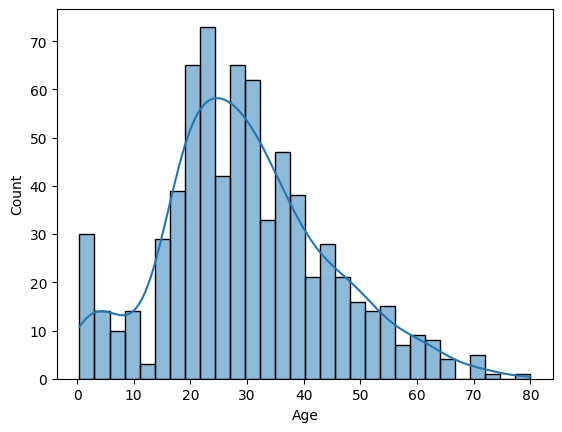

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Age'],bins=30,kde=True)

Use plots to understand distributions:


The choice of plot depends on the type of data and what you want to observe:

1️⃣ Histograms

Used for: single numeric variable.

Why we used it for Age or Fare:

You want to see the distribution:
are most passengers young? 
Are fares mostly low?
Are there outliers?

Histograms group data into bins — perfect for understanding frequency of values.

Example:

sns.histplot(df['Age'], bins=30, kde=True)


Here, kde=True adds a smooth curve to better see the shape.

What are bins in a histogram?


How bins work in sns.histplot

bins=30 does not mean each bin is 10 years.

It means the entire range of Age (from min to max) is divided into 30 equal-width intervals.

Example:

Suppose Age ranges from 0 → 80

With 30 bins, bin width = (80-0)/30 ≈ 2.67 years




A histogram groups continuous numeric data into intervals, called bins, and counts how many values fall into each bin.

Think of it like buckets:

Suppose your Age data ranges from 0 to 80.



What you can learn from it

Most common age ranges (peaks):

Look at where the tallest bars are → e.g., you mentioned 20–30 has a count above 80.

This tells you: most passengers are young adults.

Distribution shape:

Is it skewed left/right?

For Titanic, Age usually skews right slightly (more young passengers, fewer old).

Outliers:

Very small bars far on the right (e.g., Age > 70) → very few old passengers → potential outliers if needed.

Gaps or empty bins:

Shows missing or sparse ages in certain ranges.


KDE — What it is

KDE = Kernel Density Estimate

It’s a smoothed version of the histogram.

Instead of showing bars, it draws a continuous curve to represent the distribution of values.

Peaks → where most values are concentrated

Troughs → fewer values




2️⃣ Scatter Plots

Used for: relationship between two numeric variables.

Example: Age vs Fare, or Age vs Survived (though Survived is categorical 0/1).

Scatter plots are not ideal for just seeing distribution of a single variable.

3️⃣ Box Plots

Used for: detecting outliers and distribution summary.

Example: sns.boxplot(x=df['Fare'])

Shows median, quartiles, and extreme values visually.

4️⃣ Count Plots

Used for: categorical variables vs target.

Example: sns.countplot(x='Survived', hue='Sex', data=df)

Shows how many survived in each category (male/female, class 1/2/3).

💡 Rule of thumb:

1 numeric variable: histogram or boxplot

2 numeric variables: scatter plot

1 categorical + 1 target categorical: countplot or barplot

So for missing values and outliers in Age or Fare, histogram + boxplot is the best first choice.

In [149]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [150]:
mode_age = df['Age'].mode()[0]   # Take the first mode value
count_mode = (df['Age'] == mode_age).sum()
print(count_mode)


30


<Axes: >

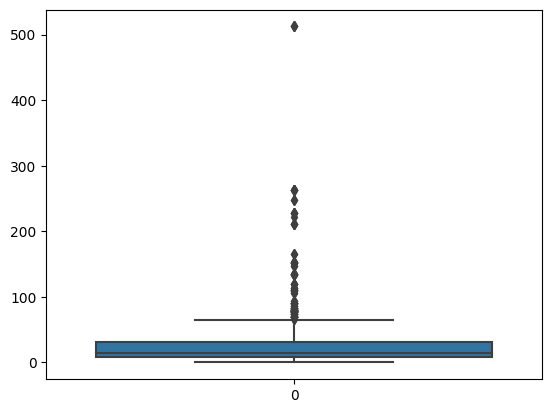

In [151]:
sns.boxplot(df['Fare'])

We can see outliers but we have only boxplot function to check outliers?
NO we can check using describe() function by obeserving 75% and maxc value difference and even we can see using histogram where in right the high values maintain a lot of gap 





Boxplot recap first:

Box → middle 50% of the data

Bottom = Q1 (25th percentile)

Top = Q3 (75th percentile)

Line inside box → median (50th percentile)

What are whiskers?

Whiskers extend from the box to show the range of “normal” values.

By default:

Lower whisker = Q1 – 1.5 × IQR

Upper whisker = Q3 + 1.5 × IQR

Where IQR = Q3 – Q1 (interquartile range)

Any data points beyond the whiskers → considered outliers and plotted as separate points

Example with Fare

Suppose:

Q1 = 7, Q3 = 50 → IQR = 43

Lower whisker = 7 – 1.5×43 = -57.5 → minimum = 0 (no negative fare)

Upper whisker = 50 + 1.5×43 = 114.5

Any fare > 114.5 → outlier (plotted as dot)

So you see which fares are extreme, not just the max.

✅ In simple words:

Whiskers = “normal range”

Anything outside whiskers = “weird/extreme values” → outliers




Position of median inside box → skewness hint

Median closer to bottom → right skewed

Median closer to top → left skewed


here we can see that median line is is towards bottom so right skewed 

Fare distribution is right-skewed → most passengers paid low fares, few paid very high fares

In [152]:
df['Age'].skew()

0.38910778230082693

skew ≈ 0 → roughly symmetric → mean is fine

skew > 0 → right-skewed → median better

skew < 0 → left-skewed → median better

In [153]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_36/1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [154]:
df["Age"].isnull().sum()

0

In [155]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df['Cabin'].fillna(method='ffill',inplace=True)

/tmp/ipykernel_36/3766012394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(method='ffill',inplace=True)
/tmp/ipykernel_36/3766012394.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cabin'].fillna(method='ffill',inplace=True)


df['Cabin'].ffill(inplace=True)  this gives a error df['Cabin'].ffill() → returns a new Series with missing values forward-filled  inplace=True does NOT work for Series 


Option 1: assign back to column

df['Cabin'] = df['Cabin'].ffill()


Option 2: use DataFrame method

df.fillna(method='ffill', inplace=True)
# this fills all columns in the DataFrame

In [158]:
df['Cabin'].isnull().sum()

1

we can check using isnull().sum() or info() this is because the first row cannt fill using ffill so we need to use bfill

In [159]:
df['Cabin'].fillna(method="bfill",inplace=True)

/tmp/ipykernel_36/1970080355.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cabin'].fillna(method="bfill",inplace=True)


In [160]:
df['Cabin'].isnull().sum()

0

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [162]:
df.dropna(subset=['Embarked'],inplace=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [164]:
df["Sex_male"]=df['Sex'].map({'male':1,'female':0})

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,1


In [166]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)


Embarked

Embarked has 3 categories: 'S', 'C', 'Q'

You can use map, but you need to assign numbers manually:

df['Embarked_num'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Works, but here you introduce ordinal relationship → model may think Q > C > S, which is not really meaningful

Better: use one-hot encoding (get_dummies)

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


Creates separate columns for Embarked_C and Embarked_Q

No false order is assumed

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,1,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,1,False,True


In [171]:
df['Family_size']=df['SibSp']+df['Parch']+1

In [172]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,total_family_size,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,1,False,True,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,False,False,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,0,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,False,True,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,1,False,True,1,1


In [174]:
df['Single']=0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,total_family_size,Family_size,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,1,False,True,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,False,False,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,0,False,True,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,False,True,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,1,False,True,1,1,0


In [178]:
df.loc[df['Family_size']==1,'Single']=1

In [179]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,total_family_size,Family_size,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,1,False,True,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,False,False,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,0,False,True,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,False,True,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,1,False,True,1,1,1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

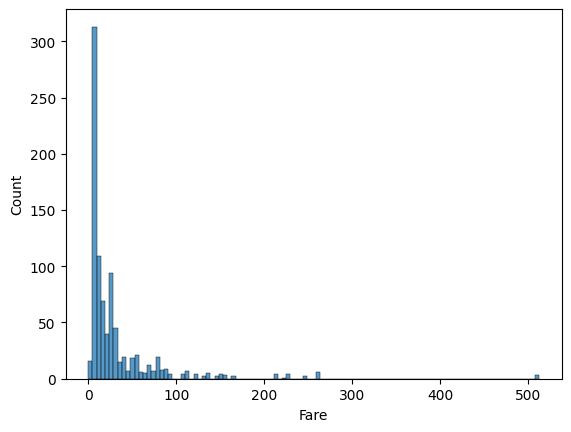

In [181]:
sns.histplot(df['Fare'])

it is a right-skewed so we cannt use z score to find outilers so best way is IQR


Idea: outliers are points far from the mean

Common rule: |z| > 3 → outlier

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]
print("Number of outliers:", len(outliers))


Pros: works well for normally distributed data

Cons: sensitive to skewed data (Fare is right-skewed)

In [194]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

print(lower)
print(upper)
df.shape

-26.7605
65.6563


(889, 17)

In [193]:
outliers=df[(df['Fare']<lower) | (df['Fare']>upper)]
outliers.shape

(114, 17)

so the above 114 are outliers peresent in Fare so we need to drop them or need to manage by using cap here we are capping 


Choice depends on the model and data

1️⃣ Capping / Winsorizing

Good for any model, especially tree-based models like:

Decision Tree, Random Forest, XGBoost, Gradient Boosting

Keeps original scale → easier to interpret

Handles few extreme values without removing rows


Capping”

Definition:
Limiting extreme values in a dataset to a certain threshold, instead of removing them.

Also called Winsorizing in statistics.

You “cap” the maximum value (and optionally “floor” the minimum) to prevent extreme values from affecting the model.

2️⃣ Log Transformation

Good for linear models (Linear Regression, Logistic Regression) or models sensitive to skew

Helps:

Reduce skewness

Stabilize variance

Make relationships more linear

Can make interpretation slightly harder → may need inverse transform

✅ Rule of thumb
Model type	Skewed data strategy
Tree-based	Capping / Winsorizing
Linear / Regression	Log-transform (or box-cox)
Count data / Positive only	Log-transform


✅ Rule of thumb:

Situation	Use Log Transform?
Skewed numeric data, many high values	Yes
Few extreme values, meaningful	No, prefer capping
Data has zeros/negatives	Use log1p (log(1+x))
Interpretation matters	Be careful / maybe avoid

In [196]:
df['Fare']=df['Fare'].clip(lower,upper)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,total_family_size,Family_size,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,1,False,True,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6563,C85,0,False,False,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,0,False,True,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,False,True,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,1,False,True,1,1,1


In [197]:
df.shape

(889, 17)